## Classification of Handwritten Digits from MNIST Database using K-Nearest Neighbor

![test](model.gif)

### I. Problem Statement

Handwritten digit recognition can be used for automated digitization of vehicle plate number from images and videos taken from superhiways using high-frame rate capable cameras. With the vehicle plate number, one can verify registration of vehicle and driver's personal information, or license validity. Digit recognition can also be extended to handwriting recognition which can be useful to identify signature forging in cheques, legal documents and certificates. In addition, handwritten textbooks and important scripts can be easily digitized and preserve a copy free from any physical deterioration.

In this study, we appplied the KNN algorithm to classify a set of handwritten digits **(0-9)** each one expressed as a flattened array of 28x28 pixel box image of handwritten digit in grey scale. The dataset is a small subset taken from MNIST database which consists of 70,000 examples collected from 500 writers composed of Census Bureau employees and highschool students.

The objective of this study is to implement the KNN algortim to predict a handwritten digit using the image pixel information as features with high accuracy. We determined the optimum number of neighbors given **N=5** trials. The accuracies were also compared using different distance metric classess such as Euclidian, Manhattan, and Chebyshev.

### II. Highlights of the Results

1. Uisng $5$ trials, the optimum number of neighbor was found to be $\text{n_neighbor}=11$. The mean test accuracy score at $n=11$ is $91.8\text{%}$. The calculated accuracy was 91.8% which is greater than the calculated value for $1.25*PCC=12.5\text{%}$. This means that the KNN model with n_neighbor=11 was highly successful in classifying the dataset.

2. The most misclassified digit is $8$. For twenty percent ($20\text{%}$) of 8's misclassifications, $8$ is being misclassified mostly as $5$ or $3$. On the other hand, $1$ is the least misclassified, having $0.001\text{%}$ chance to be mislabeled by the model.


3. The most misclassfied pair of digits is $(7,1)$. This means that the model would most likely misclassify the digit $7$ into $1$ than any other digits. This is followed by the pairs of digits $(4,9)$ and $(8,5)$. The digits were seen to have geometric similarities as after converting the pixels array into images. Stroke angle and curvatures are most striking similarities among the pairs of images. 

    Most of the digit $7$ that are misclassifed into $1$ have more vertical stroke (near $90$ degrees) than those correctly identified. The digit $4$ that are misclassified as $9$ have more curvature on the upper half, while those that are misclassified as $7$ are more slanted ($45$ degrees) compared to those correctly identified. The digit $8$ that are misclassified as $3$ have more curvature on the upper and lower part, while those misclassified as $5$ are more slanted ($45$ degrees) and have less curvature than those correctly identified.

### III. Data Discussion

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. [[1]](http://yann.lecun.com/exdb/mnist/)

The dataset was retrieved from examples of handwritten digits collected from $500$ writers composed of Census Bureau employees and highschool students. For the purpose of this study, only 10% of the whole dataset was collected. The subset was collected at random and divided using $1:7$ test-train split ratio.

The dataset used in this study has $7000$ data points (instances) and $10$ classes which consist of digits from $0-9$. The dataset was taken randomly. Thus, the number of instances per class may vary. Each instance represents an image of a handwritten digit expressed as a flattened array of 28x28 pixel box image in grey scale. There are 784 features or attributes, and each attribute represents a pixel named as pixelX where $X$ is an integer $\in[0,783]$. This is represented visually as:
$$
\begin{bmatrix}
000 & 001 & \cdot\cdot\cdot & 026 & 027 \\ 
028 & 029 & \cdot\cdot\cdot & 054 & 055 \\ 
\cdot & \cdot & \cdot\cdot\cdot & \cdot & \cdot \\
\cdot & \cdot & \cdot\cdot\cdot & \cdot & \cdot \\
756 & 757 & 758 & \cdot\cdot\cdot & 783
\end{bmatrix}
$$

In the dataset, the pixels are the columns and the rows are the instances.

In this notebook, we will be using the available MNIST dataset from [datahub.io](https://datahub.io/machine-learning/mnist_784). This CSV file contains the train and test sets mentioned earlier. 

**IMPORTANT: You need to run the cells below to download the dataset.**

In [ ]:
# !wget https://datahub.io/machine-learning/mnist_784/r/mnist_784.csv

In [ ]:
# !mv mnist_784.csv mnist_784_csv.csv

### IV. KNN Implementation

**Import Modules**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd
from tqdm import tqdm
import numpy as np

**Define Functions**

In [2]:
def knn(features, target, test_size=0.25, n=20, trials=20):
    df = pd.DataFrame()
    trial_num = 0
    for i in tqdm(range(trials)):
        X_train, X_test, y_train, y_test = train_test_split(features,
                                                target, test_size=test_size)

        training_accuracy = []
        test_accuracy = []

        neighbors_settings = range(1, n, 2)

        for n_neighbors in neighbors_settings:
            # build the model
            clf = KNeighborsClassifier(n_neighbors=n_neighbors)
            clf.fit(X_train, y_train)

            # record training set accuracy
            training_accuracy.append(clf.score(X_train, y_train))

            # record generalization accuracy
            test_accuracy.append(clf.score(X_test, y_test))

        # record results of trial  
        df2 = pd.DataFrame({'Trial':[trial_num for num in neighbors_settings],
                            'Neighbors':list(neighbors_settings),
                            'Train_acc':training_accuracy,
                            'Test_acc':test_accuracy})
        df = pd.concat([df, df2], axis=0, ignore_index=True)

        trial_num += 1
    return df
        
def plot(df, n=20):
    plt.figure(figsize=(15,10))
    sns.lineplot(x="Neighbors", 
                 y="Train_acc", 
                 ci='sd', 
                 data=df)
    sns.lineplot(x="Neighbors", 
                 y="Test_acc", 
                 ci='sd', 
                 data=df)
    plt.title("Accuracy for Training and Test Sets: MNIST "
                 "Dataset KNN-Classifier 100 Iterations, \n(Error bands = +-1 sd)")
    plt.legend(['Train', 'Test'])
    plt.ylabel("Accuracy")
    plt.xticks(np.arange(1, n, step=2));

**Check the Dataset**

In [3]:
data = pd.read_csv('mnist_784_csv.csv').sample(7000, random_state=123)

In [4]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
21971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
48447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
42344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
30324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
53692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


Population per class:      0
0  689
9  675
4  663
5  661
6  679
1  833
3  709
7  720
8  692
2  679

1.25 * Proportion Chance Criterion: 12.55804081632653%


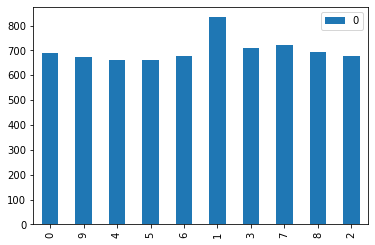

In [5]:
from collections import Counter
mnist_counts = Counter(data['class'])
df_mnist = pd.DataFrame.from_dict(mnist_counts, orient='index')
df_mnist.plot(kind='bar')

num=(df_mnist[0]/df_mnist[0].sum())**2
print("Population per class: {}\n".format(df_mnist))
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

**Define Features and Target**

In [6]:
features = data.drop(columns='class')
target = data['class']

**Quick Look at the Images**

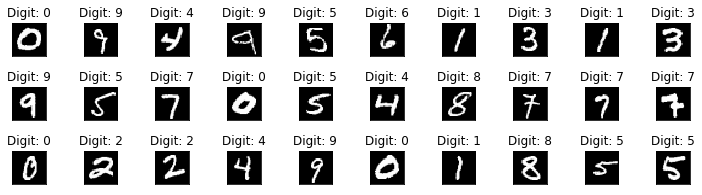

In [7]:
features_fig = features.values.astype('float32').reshape(features.shape[0],
                                                         28, 28)
target_num = target.values.astype('int32')

fig = plt.figure(figsize=(10,3))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.tight_layout()
    plt.imshow(features_fig[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(target_num[i]))
    plt.xticks([]), plt.yticks([])

**This is the sum of all of the images**

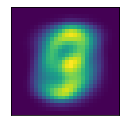

In [8]:
fig = plt.figure(figsize=(2,2))
features_fig = data.iloc[:,:-1].sum(axis=0).values.astype('float32').reshape(28, 28)
plt.imshow(features_fig, interpolation='none')
plt.xticks([]), plt.yticks([]);

**This shows the sum of each image per digit**
These plots shows the general shape of images for each class. Interestingly enough, the digits doesn't look cloudy and the hotspots are definite. This means majority of the written digits are consistent. 

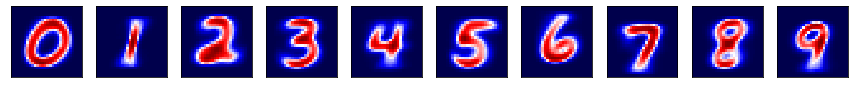

In [103]:
fig = plt.figure(figsize=(15,20))
colors=['Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'PuRd', 'BuPu', 'YlGn', 'seismic']
for i in range(10):
    data2 = data[data['class']==i]
    features_fig = data2.iloc[:,:-1].sum(axis=0).values.astype('float32').reshape(28, 28)
    
    plt.subplot(10,10,i+1)
    plt.imshow(features_fig, cmap=colors[9], interpolation='none')
    plt.xticks([]), plt.yticks([])

**Run the KNN Optimizer**

In [10]:
minst_knn = knn(features, target, test_size=1/7, n=20, trials=5)

100%|██████████| 5/5 [42:11<00:00, 506.20s/it]


**Plot the Training and Test Accuracies**

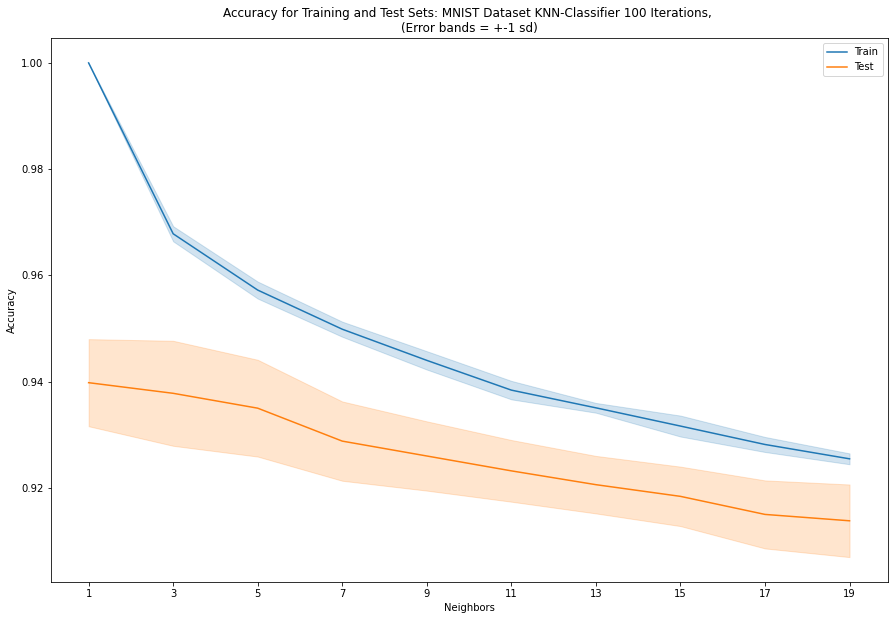

In [11]:
plot(minst_knn)

**Find the Optimum n_neighbors**

In [12]:
df_optimum_n = (minst_knn.groupby([ 'Neighbors'])['Test_acc'].agg(['mean', 'std'])
         .reset_index().sort_values('mean', ascending=False)
         .set_index('Neighbors'))

In [13]:
df_optimum_n

,mean,std
Neighbors,,
1,0.9398,0.008198
3,0.9378,0.009884
5,0.9350,0.009110
7,0.9288,0.007463
9,0.9260,0.006519
11,0.9232,0.005805
13,0.9206,0.005413
15,0.9184,0.005595
17,0.9150,0.006403


The optimum n_neighbor is 11.(mean= 0.9232	std = 0.005805)

#### KNN Implementation using n_neighbor=11

**Assign Training and Test Sets and Fit the Model**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=1/7, 
                                                    random_state=55)
clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

In [99]:
%%time
y_pred = clf.predict(X_test)
# y_pred

CPU times: user 9.21 s, sys: 8 ms, total: 9.21 s
Wall time: 2.66 s


**Calculate the Accuracy**

In [100]:
is_pred_correct = (y_test == y_pred)
f"Accuracy: {is_pred_correct.mean()}"

'Accuracy: 0.918'

In [101]:
temp = pd.DataFrame({'y_test': y_test, 
              'y_pred': y_pred, 
              'is_correct': is_pred_correct, 
              })

test = pd.concat([X_test, temp], axis=1)
pic_cols = X_test.columns

#### Digit with the most incorrect predictions.

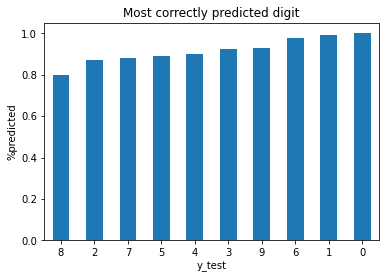

In [102]:
mis = temp.groupby('y_test')['is_correct'].mean()
mis.sort_values().plot(kind='bar')
plt.title('Most correctly predicted digit')
plt.ylabel('%predicted')
plt.xticks(rotation='horizontal');

8 has the most incorrect predictions and 1 has the most correct predictions. 

#### Percent of predictions that are incorrect

In [19]:
res = temp.groupby(['y_test', 'y_pred']).agg(['count'])['is_correct']
res2 = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_inc_pair = res2[res2['count'] < 20].sort_values(by='count', ascending=False)

In [20]:
df_inc_pair['pair'] = df_inc_pair.index

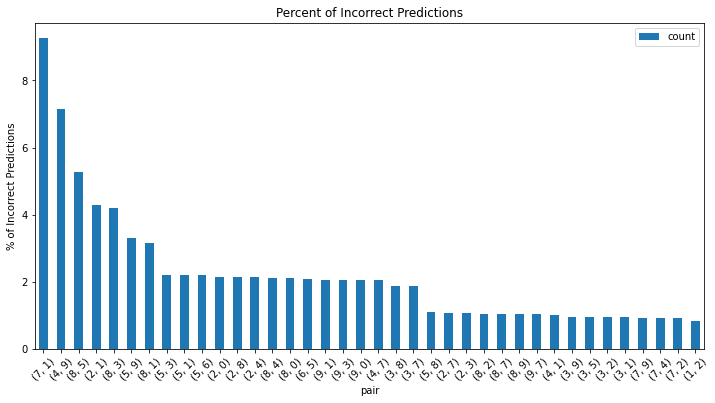

In [21]:
df_inc_pair.set_index('pair').plot(kind='bar', figsize=(12,6))
plt.ylabel('% of Incorrect Predictions')
plt.title('Percent of Incorrect Predictions')
plt.xticks(rotation=45)
plt.show();

#### Incorrect vs correct predictions

In [22]:
def number_8():    
    s = test.query("not is_correct and y_test == 8 and (y_pred == 5 or y_pred == 3 or y_pred == 1)").sample(10)
    num_col=5    
    images = []
    for idx, row in s[pic_cols].iterrows():
        images.append(row.values.reshape(28, 28))

    labels = s['y_test'].values
    prediction = s['y_pred'].values

    fig, axes = plt.subplots(2, 5, figsize=(10, 3))
    for i in range(10):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        ax.set_title('Label: {}, Prediction: {}'.format(labels[i], prediction[i]))
        ax.set_xticks([]), ax.set_yticks([])
    plt.tight_layout()
    plt.show()

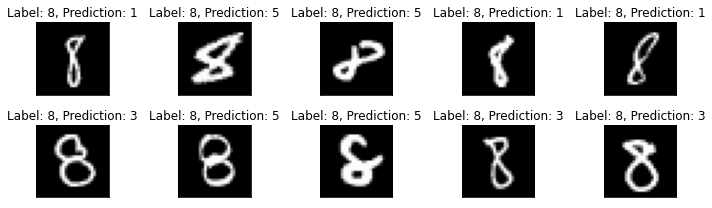

In [23]:
number_8()

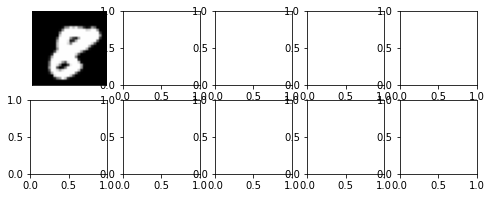

In [25]:
num_col = 5
s = test.query("is_correct and y_test == 8 and y_pred == 8").sample(10)

images = []
for idx, row in s[pic_cols].iterrows():
    images.append(row.values.reshape(28, 28))
    
labels = s['y_test'].values
prediction = s['y_pred'].values

fig, axes = plt.subplots(2, 5, figsize=(8, 3), squeeze=True)
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])

    plt.show()

In [26]:
def number_4():    
    s = test.query("not is_correct and y_test == 4 and (y_pred == 9 or y_pred == 7)").sample(9)

    images = []
    for idx, row in s[pic_cols].iterrows():
        images.append(row.values.reshape(28, 28))

    labels = s['y_test'].values
    prediction = s['y_pred'].values

    fig, axes = plt.subplots(2, 5, figsize=(10, 3))
    for i in range(9):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        ax.set_title('Label: {}, Prediction: {}'.format(labels[i], prediction[i]))
        ax.set_xticks([]), ax.set_yticks([])
    plt.tight_layout()
    plt.show()

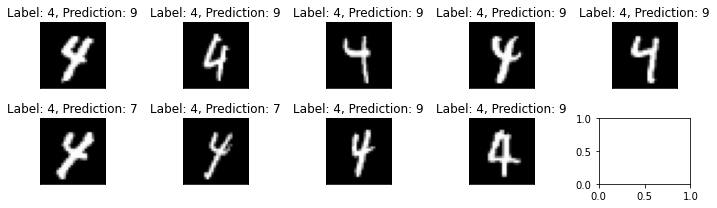

In [27]:
number_4()

In [28]:
def number_4_only():    
    s = test.query("is_correct and y_test == 4 and y_pred == 4").sample(10)

    images = []
    for idx, row in s[pic_cols].iterrows():
        images.append(row.values.reshape(28, 28))

    labels = s['y_test'].values
    prediction = s['y_pred'].values

    fig, axes = plt.subplots(2, 5, figsize=(8, 3), squeeze=True)
    for i in range(10):
        ax = axes[i//num_col, i%num_col]
        if i + 1 > len(images):
            break
        ax.imshow(images[i], cmap='gray')

        ax.set_xticks([]), ax.set_yticks([])
    plt.show()

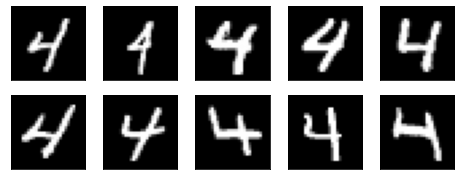

In [29]:
number_4_only()

In [30]:
def number_7():    
    s = test.query("not is_correct and y_test == 7 and (y_pred == 1 or y_pred == 9 or y_pred == 4)").sample(10)

    images = []
    for idx, row in s[pic_cols].iterrows():
        images.append(row.values.reshape(28, 28))

    labels = s['y_test'].values
    prediction = s['y_pred'].values

    fig, axes = plt.subplots(2, 5, figsize=(10, 3))
    for i in range(10):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        ax.set_title('Label: {}, Prediction: {}'.format(labels[i], prediction[i]))
        ax.set_xticks([]), ax.set_yticks([])
    plt.tight_layout()
    plt.show()

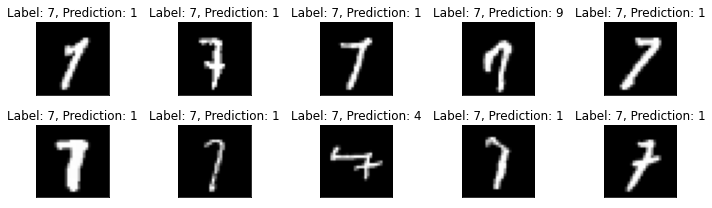

In [31]:
number_7()

#### Checking for overfitting

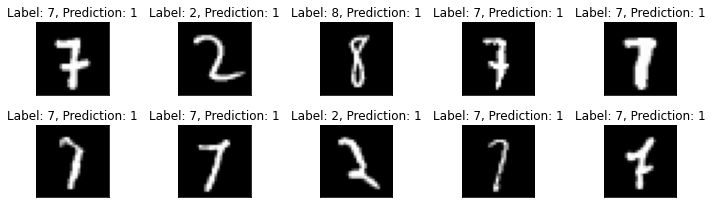

In [32]:
s = test.query("not is_correct and y_pred==1 and (y_test==9 or y_test==7 or"
               " y_test==8 or y_test==2 or y_test==4)").sample(10)
    
images = []
for idx, row in s[pic_cols].iterrows():
    images.append(row.values.reshape(28, 28))
    
prediction = s['y_pred'].values
labels = s['y_test'].values


fig, axes = plt.subplots(2, 5, figsize=(10, 3))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}, Prediction: {}'.format(labels[i], prediction[i]))
    ax.set_xticks([]), ax.set_yticks([])
plt.tight_layout()
plt.show()

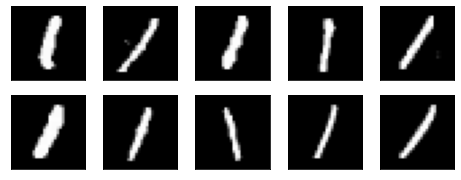

In [33]:
s = test.query("is_correct and y_test == 1 and y_pred == 1").sample(10)

images = []
for idx, row in s[pic_cols].iterrows():
    images.append(row.values.reshape(28, 28))
    
labels = s['y_test'].values
prediction = s['y_pred'].values

fig, axes = plt.subplots(2, 5, figsize=(8, 3), squeeze=True)
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
plt.show()

#### Checking different distance metrics

In [34]:
def knn2(features, target, test_size=0.25, n=20, trials=20, metric='minkowski'):
    df = pd.DataFrame()
    trial_num = 0
    for i in tqdm(range(trials)):
        X_train, X_test, y_train, y_test = train_test_split(features,
                                                target, test_size=test_size)

        training_accuracy = []
        test_accuracy = []

        neighbors_settings = range(1, n, 2)

        for n_neighbors in neighbors_settings:
            # build the model
            clf = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
            clf.fit(X_train, y_train)

            # record training set accuracy
            training_accuracy.append(clf.score(X_train, y_train))

            # record generalization accuracy
            test_accuracy.append(clf.score(X_test, y_test))

        # record results of trial  
        df2 = pd.DataFrame({'Trial':[trial_num for num in neighbors_settings],
                            'Neighbors':list(neighbors_settings),
                            'Train_acc':training_accuracy,
                            'Test_acc':test_accuracy})
        df = pd.concat([df, df2], axis=0, ignore_index=True)

        trial_num += 1
    return df

def opt_n(df):
    return (df.groupby([ 'Neighbors'])['Test_acc'].agg(['mean', 'std'])
             .reset_index().sort_values('mean', ascending=False)
             .set_index('Neighbors'))

In [36]:
data2 = pd.read_csv('mnist_784_csv.csv').sample(1400, random_state=123)
features2 = data2.drop(columns='class')
target2 = data2['class']

**Minkowski Distance**

100%|██████████| 5/5 [01:48<00:00, 21.76s/it]


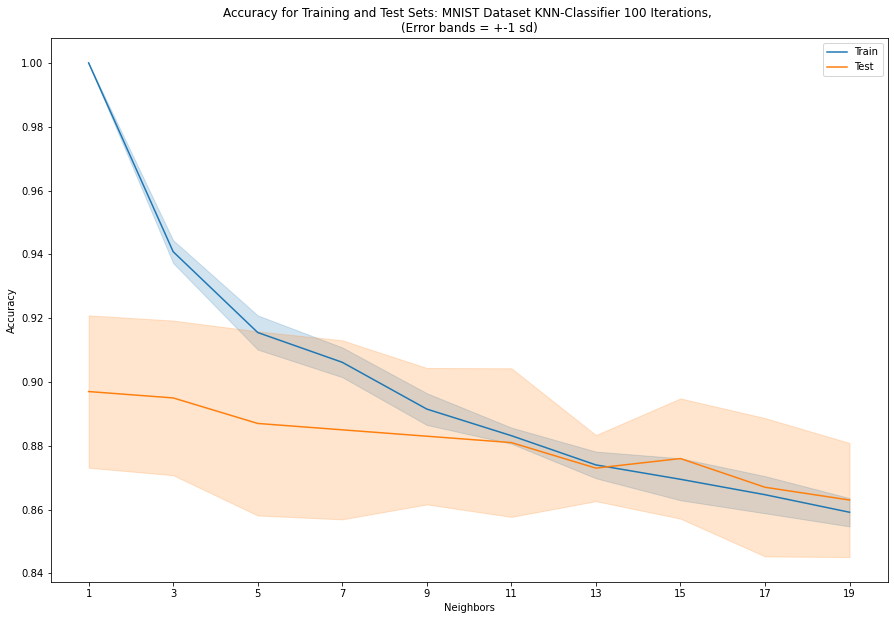

In [67]:
minst_knn2 = knn2(features2, target2, test_size=1/7, n=20, trials=5, metric='minkowski')
plot(minst_knn2)

In [68]:
opt_n(minst_knn2)

,mean,std
Neighbors,,
1,0.897,0.023875
3,0.895,0.024238
5,0.887,0.028853
7,0.885,0.028062
9,0.883,0.021389
11,0.881,0.023292
15,0.876,0.018841
13,0.873,0.010368
17,0.867,0.021679


In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=1/7, 
                                                    random_state=55)

In [70]:
clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1, metric='minkowski')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

In [71]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 9.13 s, sys: 8 ms, total: 9.13 s
Wall time: 2.46 s


In [72]:
is_pred_correct = (y_test == y_pred)
temp = pd.DataFrame({'y_test': y_test, 
              'y_pred': y_pred, 
              'is_correct': is_pred_correct, 
              })
test = pd.concat([X_test, temp], axis=1)
pic_cols = X_test.columns
f"Accuracy: {is_pred_correct.mean()}"

'Accuracy: 0.918'

In [73]:
mis = temp.groupby('y_test')['is_correct'].mean()
mis.sort_values()

y_test
8    0.800000
2    0.870968
7    0.879630
5    0.890110
4    0.897959
3    0.924528
9    0.927835
6    0.979167
1    0.991803
0    1.000000
Name: is_correct, dtype: float64

**Euclidean Distance**

100%|██████████| 5/5 [01:51<00:00, 22.21s/it]


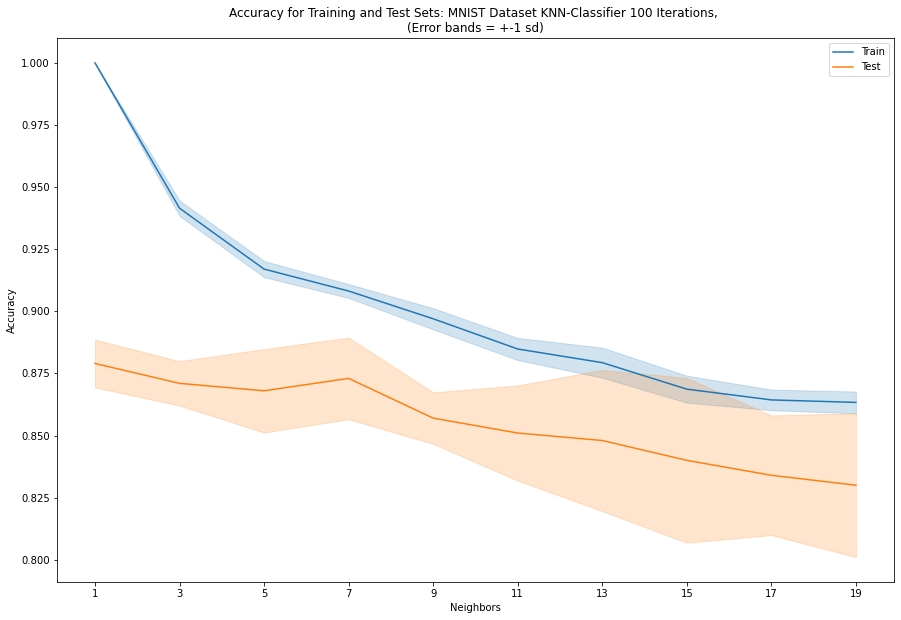

In [74]:
minst_knn3 = knn2(features2, target2, test_size=1/7, n=20, trials=5, metric='euclidean')
plot(minst_knn3)

In [75]:
opt_n(minst_knn3)

,mean,std
Neighbors,,
1,0.879,0.009618
7,0.873,0.016432
3,0.871,0.008944
5,0.868,0.016808
9,0.857,0.010368
11,0.851,0.019170
13,0.848,0.028417
15,0.840,0.033166
17,0.834,0.024083


In [76]:
clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1, metric='euclidean')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

In [77]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 9.71 s, sys: 28 ms, total: 9.74 s
Wall time: 2.55 s


In [78]:
is_pred_correct = (y_test == y_pred)
temp = pd.DataFrame({'y_test': y_test, 
              'y_pred': y_pred, 
              'is_correct': is_pred_correct, 
              })
test = pd.concat([X_test, temp], axis=1)
pic_cols = X_test.columns
f"Accuracy: {is_pred_correct.mean()}"

'Accuracy: 0.918'

In [79]:
mis = temp.groupby('y_test')['is_correct'].mean()
mis.sort_values()

y_test
8    0.800000
2    0.870968
7    0.879630
5    0.890110
4    0.897959
3    0.924528
9    0.927835
6    0.979167
1    0.991803
0    1.000000
Name: is_correct, dtype: float64

**Manhattan Distance**

100%|██████████| 5/5 [01:45<00:00, 21.18s/it]


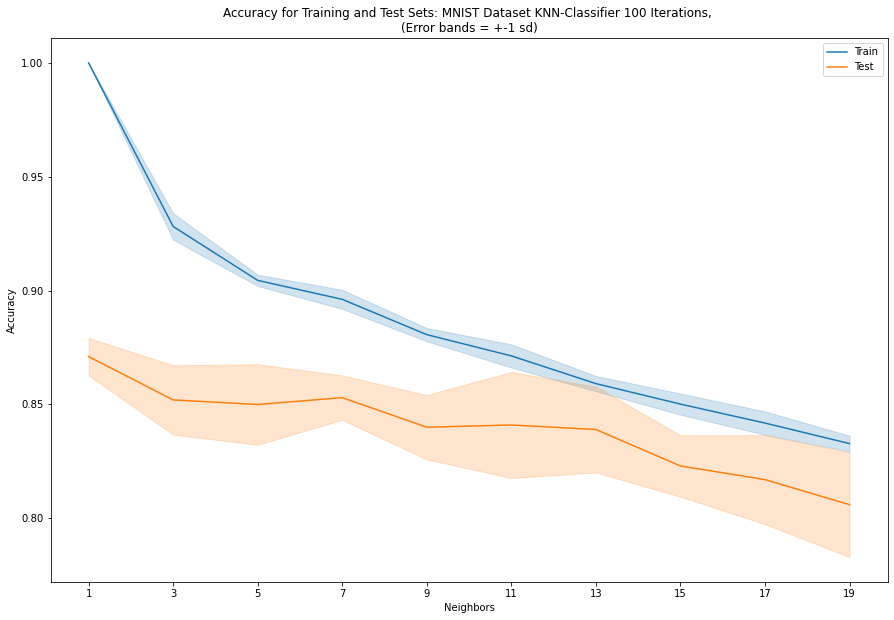

In [80]:
minst_knn4 = knn2(features2, target2, test_size=1/7, n=20, trials=5, metric='manhattan')
plot(minst_knn4)

In [81]:
opt_n(minst_knn4)

,mean,std
Neighbors,,
1,0.871,0.008216
7,0.853,0.009747
3,0.852,0.015248
5,0.850,0.017678
11,0.841,0.023292
9,0.840,0.014142
13,0.839,0.018841
15,0.823,0.013509
17,0.817,0.019558


In [82]:
clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1, metric='manhattan')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

In [83]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 9.5 s, sys: 7.99 ms, total: 9.51 s
Wall time: 2.55 s


In [84]:
is_pred_correct = (y_test == y_pred)
temp = pd.DataFrame({'y_test': y_test, 
              'y_pred': y_pred, 
              'is_correct': is_pred_correct, 
              })
test = pd.concat([X_test, temp], axis=1)
pic_cols = X_test.columns
f"Accuracy: {is_pred_correct.mean()}"

'Accuracy: 0.904'

In [85]:
mis = temp.groupby('y_test')['is_correct'].mean()
mis.sort_values()

y_test
8    0.768421
4    0.846939
2    0.849462
5    0.857143
7    0.879630
3    0.915094
9    0.917526
6    0.979167
0    1.000000
1    1.000000
Name: is_correct, dtype: float64

**Chebyshev Distance**

100%|██████████| 5/5 [01:19<00:00, 15.96s/it]


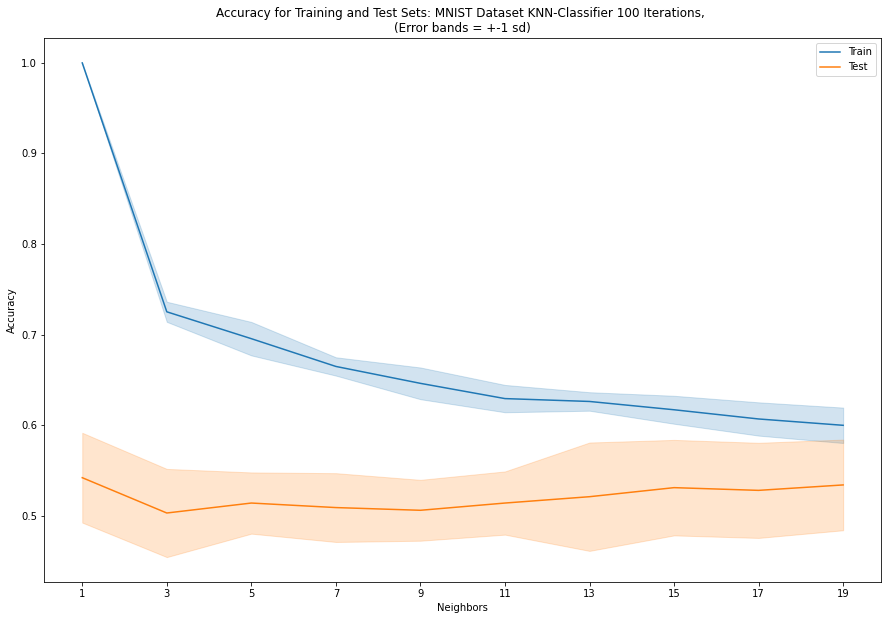

In [86]:
minst_knn5 = knn2(features2, target2, test_size=1/7, n=20, trials=5, metric='chebyshev')
plot(minst_knn5)

In [87]:
opt_n(minst_knn5)

,mean,std
Neighbors,,
1,0.542,0.049573
19,0.534,0.050050
15,0.531,0.052726
17,0.528,0.052512
13,0.521,0.059833
5,0.514,0.033801
11,0.514,0.034893
7,0.509,0.037980
9,0.506,0.033615


In [88]:
clf = KNeighborsClassifier(n_neighbors=11, n_jobs=-1, metric='chebyshev')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='uniform')

In [89]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 7.02 s, sys: 7 µs, total: 7.02 s
Wall time: 1.95 s


In [90]:
is_pred_correct = (y_test == y_pred)
temp = pd.DataFrame({'y_test': y_test, 
              'y_pred': y_pred, 
              'is_correct': is_pred_correct, 
              })
test = pd.concat([X_test, temp], axis=1)
pic_cols = X_test.columns
f"Accuracy: {is_pred_correct.mean()}"

'Accuracy: 0.638'

In [91]:
mis = temp.groupby('y_test')['is_correct'].mean()
mis.sort_values()

y_test
3    0.349057
5    0.384615
2    0.537634
4    0.540816
8    0.547368
7    0.648148
9    0.721649
6    0.739583
0    0.872340
1    0.967213
Name: is_correct, dtype: float64

In [92]:
res = temp.groupby(['y_test', 'y_pred']).agg(['count'])['is_correct']
res2 = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
res2[res2['count'] < 20].sort_values(by='count', ascending=False)

count
y_test y_pred           
5      8       19.780220
3      2       17.924528
       8       17.924528
7      1       13.888889
8      2       13.684211
...                  ...
4      3        1.020408
       6        1.020408
3      4        0.943396
       6        0.943396
7      5        0.925926

[71 rows x 1 columns]

### V. Discussion of Results

**Optimum Number of Neighbors**

Uisng $5$ trials, the optimum number of neighbor was found to be $\text{n_neighbor}=11$. The mean accuracy score at $n=11$ is $0.9232$ with standard deviation of 0.005805. At $n<11$, the accuracy is higher by $0.01-0.02$ but the standard deviation also increases by as much as $0.002-0.003$. At $n>11$, the accuracy declines by a rate of $0.001$ for every increase in n_neighbor, while the standard deviation has relatively maintained up to $n=20$ neighbors.

The KNN model with n_neighbor=11 was used to fit the test set. The test set constitutes 1:7 or 14.3% of the entire dataset taken from MNIST database. The calculated accuracy was 91.8% which is greater than the calculated value for $1.25*PCC=12.5\text{%}$. This means that the KNN model with n_neighbor=11 was highly successful in classifying the dataset.

In [93]:
df_optimum_n

,mean,std
Neighbors,,
1,0.9398,0.008198
3,0.9378,0.009884
5,0.9350,0.009110
7,0.9288,0.007463
9,0.9260,0.006519
11,0.9232,0.005805
13,0.9206,0.005413
15,0.9184,0.005595
17,0.9150,0.006403


**Misclassified Digits**

Most misclassified digit

The most misclassified digit is 8. Twenty percent (20%) of the time, 8 is being misclassified mostly as 5 or 3. On the other hand, 1 is the least misclassified, having 0.001% chance to be mislabeled by the model.

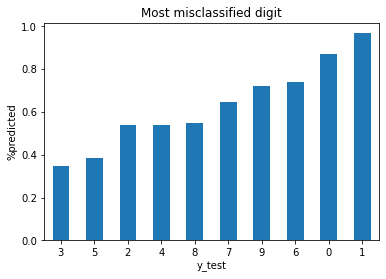

In [94]:
mis.sort_values().plot(kind='bar')
plt.title('Most misclassified digit')
plt.ylabel('%predicted')
plt.xticks(rotation='horizontal');

Most incorrectly paired digits

The most incorrectly paired digits (true, predicted) are $(7, 1)$. This means that the model would most likely misclassify the digit 7 into 1 than any other digits. From the chart below, almost 9% of the time, the model misclassifies the digit 7 into 1. But the reverse is not true. The model does not misclassify 1 into 7. 

The next most misclassified pair of digits are $(4,9)$ and $(8,5)$. Seven percent (7%) of the time, the model misclassifies 4 into 9 while 5% of the time, it misclassifies 8 into 5. The model also misclassifies 5 into 8 at 1% of the time.

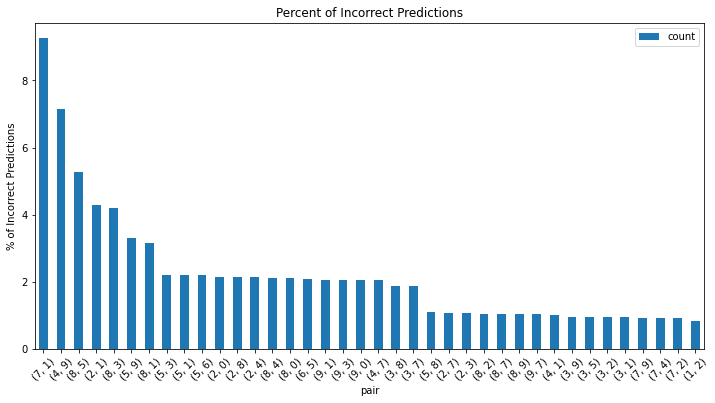

In [95]:
df_inc_pair.set_index('pair').plot(kind='bar', figsize=(12,6))
plt.ylabel('% of Incorrect Predictions')
plt.title('Percent of Incorrect Predictions')
plt.xticks(rotation=45)
plt.show();

Geometric Similarities

The misclassfied pair of digits are geometrically similar. The images from the test set of the incorect pairs (7,1), (4,9) and (8,5) have geometric similarities as observed after converting the pixels array into images. Stroke angle and curvatures are most striking similarities among the pairs of images.

Most of the digit 7 that are misclassifed into 1 have more vertical stroke (near 90 degrees) than those correctly identified. The absnce of the horizontal stroke at the center of the digit 7 also increases the chance to be misclassified into 1. 

The digit 4 that are misclassified as 9 have more curvature on the upper half, while those that are misclassified as 7 are more slanted (45 degrees) compared to those correctly identified.

The digit 8 that are misclassified as 3 have more curvature on the upper and lower part, while those misclassified as 5 are more slanted (45 degrees) and have less curvature than those correctly identified. 

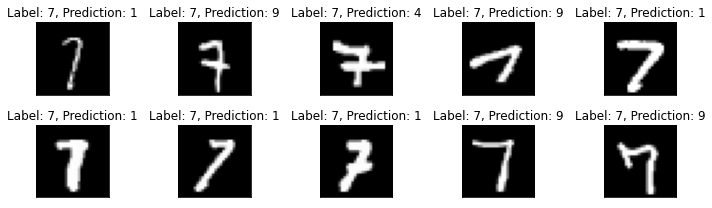

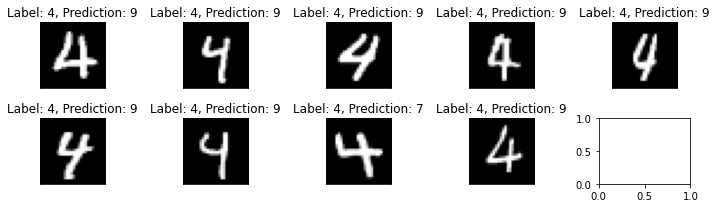

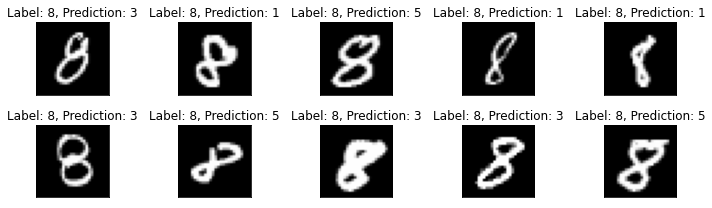

In [96]:
number_7()
number_4()
number_8()

**Most Suitable Distance Metric**

Different distance metrics were explored. The accuracies of the KNN model with n_neighbor=11 using different distance metrics were recorded:
- Euclidean: accuracy = 0.918
- Manhattan: accuracy = 0.904
- Chebyshev: accuracy  = 0.638

The accuracies were calculated using 100 trials. Based from the result, the best metric is Euclidian (p=2).